In [1]:
%matplotlib inline
import psluncert

# Falling Ball Viscometer
## Example E3 from NIST 1900

Reference: NIST Technical Note 1900 (http://dx.doi.org/10.6028/NIST.TN.1900)

This example demonstrates loading the configuration from a file.

In [2]:
u = psluncert.UncertCalc.from_configfile('../ex_viscometer.yaml')
u.calculate()




Method            |Mean |Standard Uncertainty 
------------------|-----|---------------------
GUM Approximation |5.7  |1.0                  
Monte Carlo       |5.8  |1.1                  



In [3]:
# Since the functions are defined in the ex_viscometer.yaml
# file, showing them here can be useful.
u.out.report_func()

In [4]:
u.out.report_inputs()


Variable   |Mean    |Std. Uncertainty |Deg. Freedom |Description                                  
-----------|--------|-----------------|-------------|---------------------------------------------
  |4.630   |0.046            |inf          |Viscosity of calibration liquid              
    |61.0    |6.1              |inf          |Travel time (s) in sodium hydroxide solution 
 |1180.00 |0.50             |inf          |Density (kg/m3) of sodium hydroxide solution 
 |810.00  |0.50             |inf          |Density (kg/m3) of calibration liquid        
    |36.6    |5.5              |inf          |Travel time (s) in calibration liquid        
 |2217.00 |0.50             |inf          |Density (kg/m3) of ball                      



In [5]:
u.out.report_expanded()

### GUM Approximation


Interval |Min |Max |k     |Deg. Freedom |Expanded Uncertainty 
---------|----|----|------|-------------|---------------------
99.00%   |3.0 |8.3 |2.576 |inf          |2.6                  
95.00%   |3.7 |7.7 |1.960 |inf          |2.0                  
90.00%   |4.0 |7.4 |1.645 |inf          |1.7                  
68.00%   |4.7 |6.7 |0.994 |inf          |1.0                  

### Monte Carlo

Symmetric Coverage Intervals

Interval |Min |Max |k     
---------|----|----|------
99.00%   |3.7 |9.7 |2.723 
95.00%   |4.1 |8.4 |1.950 
90.00%   |4.3 |7.8 |1.598 
68.00%   |4.8 |6.9 |0.932 



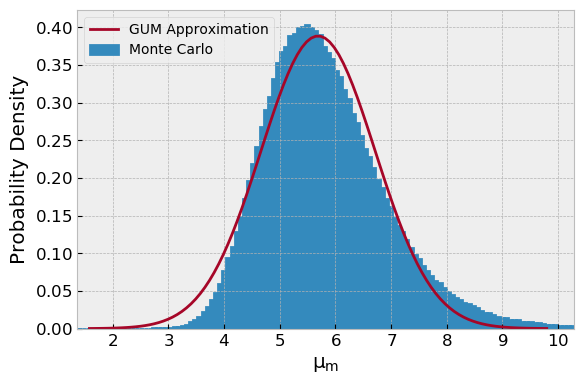

In [6]:
# Compare to NIST1900 Exhibit 3.
u.out.plot_pdf();

In [7]:
# What did the GUM calculation actually do?
u.out.report_derivation(solve=True)

### Function:



GUM formula for combined uncertainty:



### Input Definitions:


Variable            |Std. Uncertainty   
--------------------|-------------------
    | 
      |    
 |  
  |  
      |    
 |  

### Sensitivity Coefficients:













### Simplified combined uncertainty:



### Effective degrees of freedom:



---

